<a href="https://colab.research.google.com/github/romeroc223/SySistemas2025/blob/main/Parcial_1_SyS_2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2025-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.


## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - Sede Manizales

 **Instrucciones**

 -- Para recibir crédito total por sus respuestas, estas deben estar claramente justificadas e ilustrar sus procedimientos y razonamientos (paso a paso) de forma concreta, clara y completa.

-- El parcial debe ser enviado al correo electrónico amalvarezme@unal.edu.co antes de las 23:59 del 11 de octubre de 2025, vía link de GitHub, con componentes teóricas de solución a mano en formato pdf y componentes de simulación en un cuaderno de Python.ipynb.

-- Los códigos deben estar debidamente comentados y discuti
dos en celdas de texto (markdown). Códigos no comentados ni discutidos, no serán contabilizados en la nota final.

# Pregunta 1
La distancia media entre dos señales periódicas $x_1(t) ∈ R,C$ y $x_2(t) ∈ R,C;$  se puede expresar a partir de la potencia media de la diferencias entre ellas:
$$
d^{2}(x_{1},x_{2})=\bar{P}_{x_{1}-x_{2}}=\displaystyle \lim_{T \to \infty }\frac{1}{T}\int_{T}^{}\left | x_{1}(t)-x_{2}(t)\right |^{2}dt
$$
Sean $x_{1}(t)$ y $x_{2}(t)$:
$$
x_{1}(t)=A\,cos(\omega _{0}t),\quad\omega _{0}=\frac{2\pi }{T},\quad T,A \in\mathbb{R}^{+}
$$

$$
x_{1}(t)=Ae^{-jnw_{0}t}
$$

$$
x_{2}(t)=Be^{jmw_{0}t}
$$

con $w_{0}=\frac{2\pi }{T},\quad T,A,B \in\mathbb{R}^{+}$ y $n, m ∈ R$ $Z$. Determine las distancias entre las dos señales. Compruebe sus resultados con Python.

Distancia cuadrática media d² = 12.9988


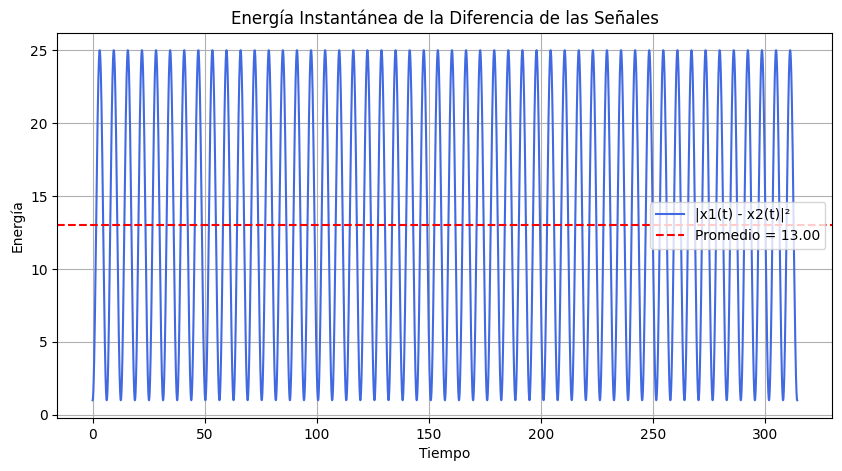

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 2
B = 3
T0 = 2 * np.pi
w0 = 2 * np.pi / T0
n = 2
m = -3   # Puedes probar con otros valores para ver cómo cambia (n+m) = 0 constante de lo contrario oscila

# Tiempo largo para aproximar promedio
t = np.linspace(0, 50 * T0, 10000)

# Señales complejas
x1 = A * np.exp(-1j * n * w0 * t)
x2 = B * np.exp(1j * m * w0 * t)

# Diferencia y módulo al cuadrado
diff = x1 - x2
energy = np.abs(diff)**2
d2 = np.mean(energy)

# Mostrar resultado numérico
print(f"Distancia cuadrática media d² = {d2:.4f}")

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(t, energy, label='|x1(t) - x2(t)|²', color='royalblue')
plt.axhline(y=d2, color='red', linestyle='--', label=f'Promedio = {d2:.2f}')
plt.title('Energía Instantánea de la Diferencia de las Señales')
plt.xlabel('Tiempo')
plt.ylabel('Energía')
plt.grid(True)
plt.legend()
plt.show()



# Pregunta 2
Encuentre la señal en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de $5kHz$ y $4$ bits de capacidad de representación, aplicado a la señal continua:

$x(t) = 3\cos(1000πt) + 5\sin(3000πt) + 10\cos(11000πt)?$.

Realizar la simulación del proceso de discretización (incluyendo al menos tres periodos de $x(t)$). En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

Ω1 = 0.63 rad/muestra
Ω2 = 1.88 rad/muestra
Ω3 antes de aliasing = 6.91 rad/muestra
Ω3 después de aliasing = 0.63 rad/muestra


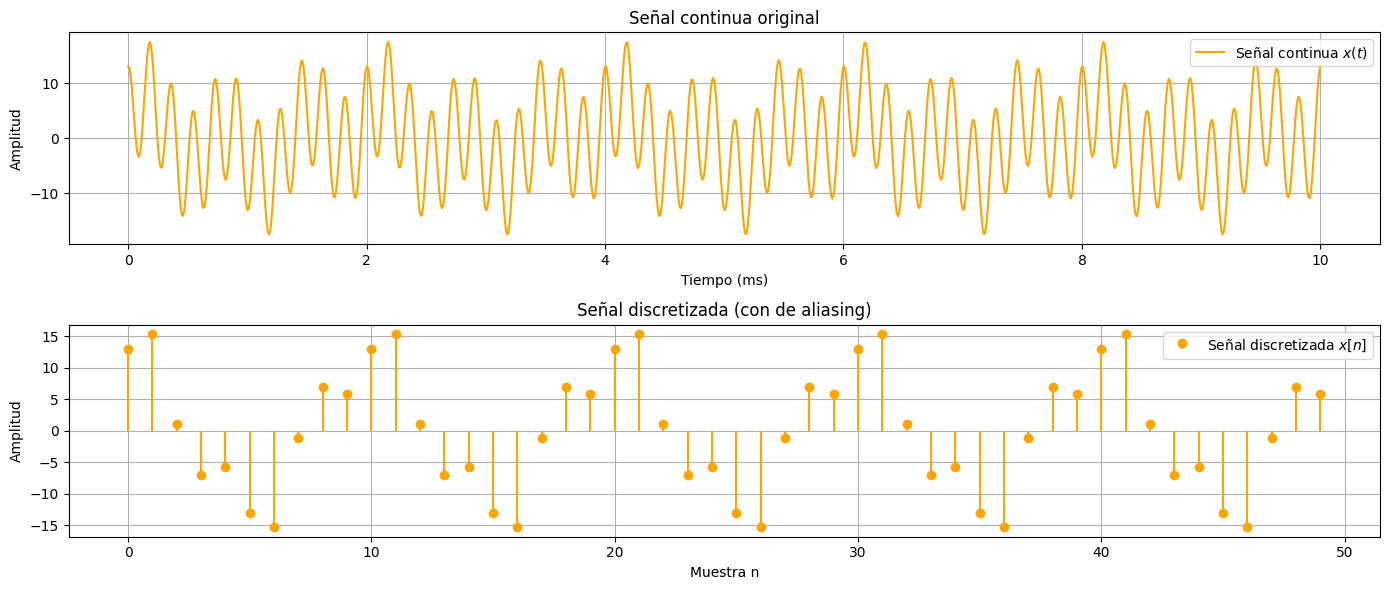

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 5000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 0.01, 1000)  # Tiempo continuo (10 ms)

# Frecuencias angulares continuas
w1 = 1000 * np.pi
w2 = 3000 * np.pi
w3 = 11000 * np.pi

# Señal continua
x_t = 3 * np.cos(w1 * t) + 5 * np.sin(w2 * t) + 10 * np.cos(w3 * t)

# Señal discretizada
N = 50  # Número de muestras
n = np.arange(N)

# Frecuencias angulares normalizadas (Omega = w / Fs)
Omega1 = w1 / Fs
Omega2 = w2 / Fs
Omega3 = w3 / Fs

# Aliasing: llevar Omega3 al intervalo [-pi, pi]
if Omega3 > np.pi:
    Omega3_alias = Omega3 - 2*np.pi
else:
    Omega3_alias = Omega3

# Mostrar frecuencias normalizadas antes y después de aliasing
print(f"Ω1 = {Omega1:.2f} rad/muestra")
print(f"Ω2 = {Omega2:.2f} rad/muestra")
print(f"Ω3 antes de aliasing = {Omega3:.2f} rad/muestra")
print(f"Ω3 después de aliasing = {Omega3_alias:.2f} rad/muestra")

# Señal discretizada después de aliasing
x_n = (13) * np.cos(Omega1 * n) + 5 * np.sin(Omega2 * n)

# Graficar señal continua y discretizada
plt.figure(figsize=(14, 6))

# Señal continua
plt.subplot(2, 1, 1)
plt.plot(t*1000, x_t, label='Señal continua $x(t)$', color='orange')
plt.title('Señal continua original')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal discretizada
plt.subplot(2, 1, 2)
plt.stem(n, x_n, basefmt=" ", label='Señal discretizada $x[n]$', linefmt='orange', markerfmt='o')
plt.title('Señal discretizada (con de aliasing)')
plt.xlabel('Muestra n')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

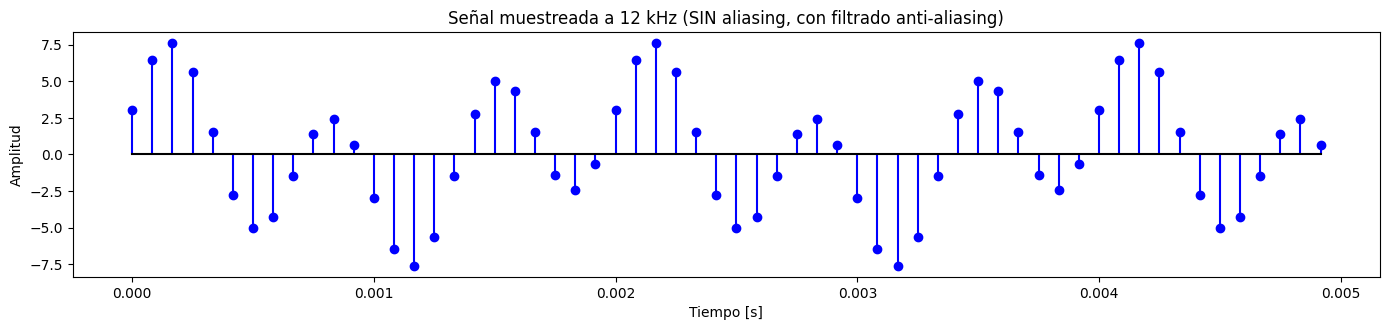

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A1, A2, A3 = 3, 5, 10
w1 = 1000 * np.pi   # 500 Hz
w2 = 3000 * np.pi   # 1500 Hz
w3 = 11000 * np.pi  # 5500 Hz

# Intervalo de tiempo corto para visualización
t_12k = np.arange(0, 0.005, 1/12000)

# Señal muestreada a 12 kHz (sin componente de 5500 Hz por filtrado)
x_12k = A1 * np.cos(w1 * t_12k) + A2 * np.sin(w2 * t_12k)

# Graficar ambas señales
plt.figure(figsize=(14, 6))

plt.subplot(2,1,2)
plt.stem(t_12k, x_12k, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title('Señal muestreada a 12 kHz (SIN aliasing, con filtrado anti-aliasing)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Pregunta 3
Sea $x′′(t)$ la segunda derivada de la señal $x(t)$, donde $t$ $∈$ $[ti, tf]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$
c_{n}=\frac{1}{(ti-tf)n^{2}w_{o}^{2}}\int_{t_i}^{t_f}x^{''}(t)e^{-jnw_{o}t}dt;\quad n\in\mathbb{Z}
$$
¿Cómo se pueden calcular los coeficientes an y bn desde $x′′(t)$ en la serie trigonométrica de Fourier?.

# Pregunta 4

Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para $n∈{0,±1,±2,±3,±4,±5}$, a partir de $x′′(t)$ para la señal $x(t)$ en la Figura 1 . Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1
T = 3
d1 = T / 6
d2 = T / 4
w0 = 2 * np.pi / T
N = 4096  # Mayor resolución

# Puntos clave de la señal
t_nodes = np.array([-T/2, -d2, -d1, 0, d1, d2, T/2])
x_nodes = np.array([0, 0, A, 0, A, 0, 0])

# Señal continua vía interpolación

t = np.linspace(-T/2, T/2, N)
x = np.interp(t, t_nodes, x_nodes)

# Derivadas numéricas
dx = np.gradient(x, t)
ddx = np.gradient(dx, t)

# Coeficientes desde x''(t)

harmonics = np.arange(-5, 6)
c_xx = []

for n in harmonics:
    if n == 0:
        c_xx.append(0)
    else:
        integrand = ddx * np.exp(-1j * n * w0 * t)
        cn = np.trapz(integrand, t) / (T * n**2 * w0**2)
        c_xx.append(cn)

c_xx = np.array(c_xx)

# Coeficientes desde x(t) por FFT

X = np.fft.fftshift(np.fft.fft(x)) / N
f = np.fft.fftshift(np.fft.fftfreq(N, d=t[1]-t[0]))  # en Hz
freqs_analiticas = harmonics * w0 / (2 * np.pi)
idx = [np.argmin(np.abs(f - f0)) for f0 in freqs_analiticas]
c_fft = X[idx]

# Tabla comparativa

print(f"{'n':>3} | {'Re(c)':>10} | {'Im(c)':>10} | {'|c|':>10} | {'Fase':>8} | {'Error %':>10}")
print("-" * 60)

for i, n in enumerate(harmonics):
    c1 = c_xx[i]
    c2 = c_fft[i]
    error = np.abs(c1 - c2) / (np.abs(c2) + 1e-12) * 100
    print(f"{n:3d} | {c1.real:10.4e} | {c1.imag:10.4e} | {np.abs(c1):10.4e} | {np.angle(c1):8.4f} | {error:10.2f}")

  n |      Re(c) |      Im(c) |        |c| |     Fase |    Error %
------------------------------------------------------------
 -5 | -6.0793e-03 | 1.0799e-17 | 6.0793e-03 |   3.1416 |       1.48
 -4 | 8.5489e-02 | -4.2183e-18 | 8.5489e-02 |  -0.0000 |     199.92
 -3 | 1.3509e-01 | -7.4993e-18 | 1.3509e-01 |  -0.0000 |       0.23
 -2 | 3.7995e-02 | 0.0000e+00 | 3.7995e-02 |   0.0000 |     200.24
 -1 | -1.5198e-01 | -1.3499e-16 | 1.5198e-01 |  -3.1416 |       0.08
  0 | 0.0000e+00 | 0.0000e+00 | 0.0000e+00 |   0.0000 |     100.00
  1 | -1.5198e-01 | 1.3499e-16 | 1.5198e-01 |   3.1416 |       0.08
  2 | 3.7995e-02 | 0.0000e+00 | 3.7995e-02 |   0.0000 |     200.24
  3 | 1.3509e-01 | 7.4993e-18 | 1.3509e-01 |   0.0000 |       0.23
  4 | 8.5489e-02 | 4.2183e-18 | 8.5489e-02 |   0.0000 |     199.92
  5 | -6.0793e-03 | -1.0799e-17 | 6.0793e-03 |  -3.1416 |       1.48


/tmp/ipython-input-4175640025.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  cn = np.trapz(integrand, t) / (T * n**2 * w0**2)


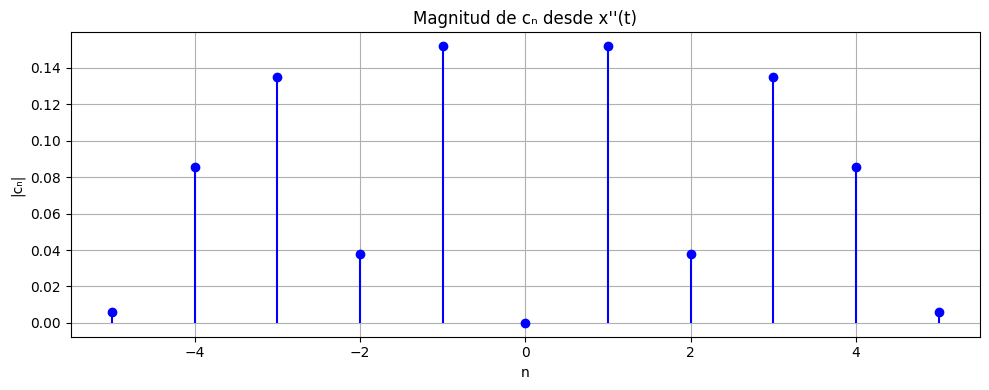

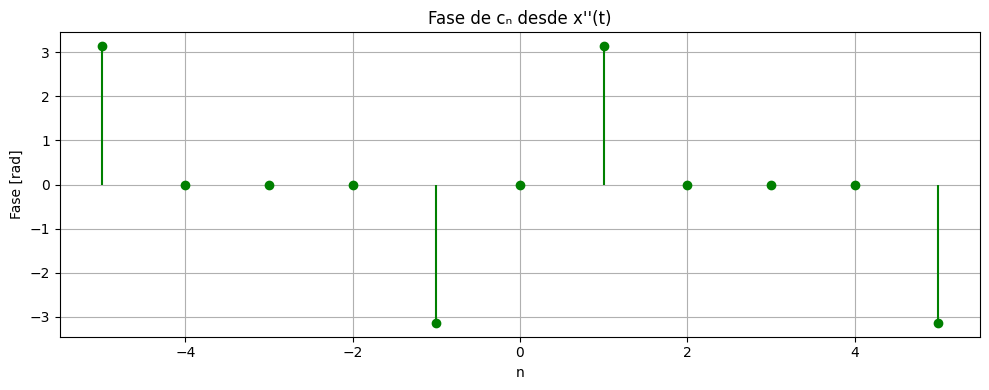

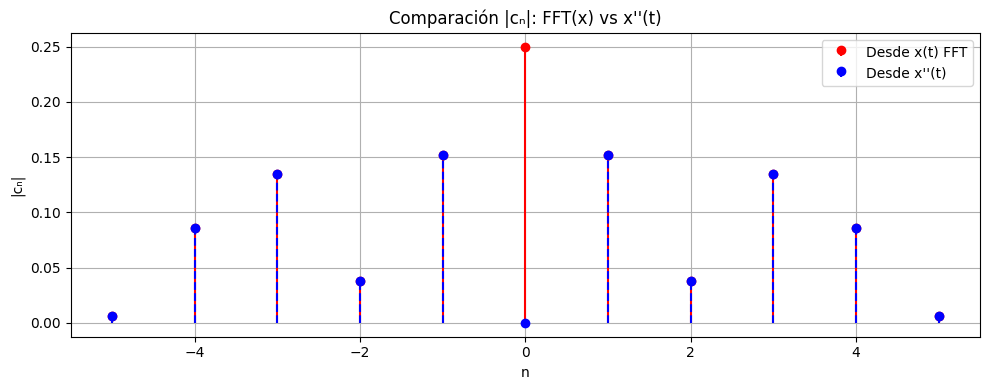

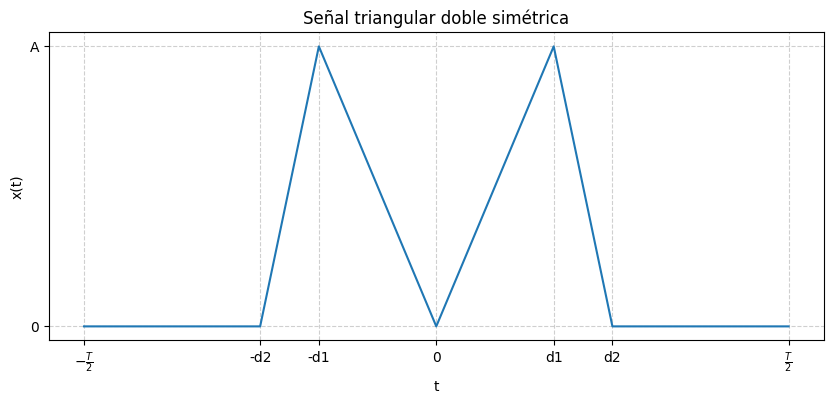

In [ ]:
# Espectro de magnitud
plt.figure(figsize=(10, 4))
plt.stem(harmonics, np.abs(c_xx), basefmt=" ", linefmt="b-", markerfmt="bo", label="Desde x''(t)")
plt.title("Magnitud de cₙ desde x''(t)")
plt.xlabel('n')
plt.ylabel('|cₙ|')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fase de los coeficientes
plt.figure(figsize=(10, 4))
plt.stem(harmonics, np.angle(c_xx), basefmt=" ", linefmt="g-", markerfmt="go")
plt.title("Fase de cₙ desde x''(t)")
plt.xlabel('n')
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparación con FFT
plt.figure(figsize=(10, 4))
plt.stem(harmonics, np.abs(c_fft), linefmt='r-', markerfmt='ro', basefmt=' ', label='Desde x(t) FFT')
plt.stem(harmonics, np.abs(c_xx), linefmt='b--', markerfmt='bo', basefmt=' ', label='Desde x\'\'(t)')
plt.title('Comparación |cₙ|: FFT(x) vs x\'\'(t)')
plt.xlabel('n')
plt.ylabel('|cₙ|')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Graficar
plt.figure(figsize=(10,4))
plt.plot(t_nodes, x_nodes, linewidth=1.5)
plt.grid(True, linestyle='--', alpha=0.6)

# Etiquetas y límites
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Señal triangular doble simétrica')
plt.xticks([-T/2, -d2, -d1, 0, d1, d2, T/2],
           [r'$-\frac{T}{2}$', '-d2', '-d1', '0', 'd1', 'd2', r'$\frac{T}{2}$'])
plt.yticks([0, A], ['0', 'A'])
plt.show()